In [2]:
# import required libraries
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.dates as mdates
%matplotlib inline

In [3]:
# define function to display json in more readable format 
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
# set environment variables
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# set institution id constant
INSTITUTION_ID = "ins_109508"

In [6]:
# create client - detailed in plaid api documentation
client = plaid.Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    public_key=PLAID_PUBLIC_KEY,
    environment=PLAID_ENV,
    api_version='2019-05-29'
)

### 2. Generate a public token

In [7]:
# create response from sandbox - detailed in plaid api documentation
create_response = client.Sandbox.public_token.create(
    INSTITUTION_ID, ['transactions'])

### 3. Exchange the public token for an access token

In [8]:
# create exchange response from response
exchange_response = client.Item.public_token.exchange(
    create_response['public_token'])

# set access token from exchange response
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [9]:
# create response for accounts
response = client.Accounts.get(access_token)

In [10]:
# fetch accounts from accounts
accounts = response['accounts']
pretty_print_response(accounts[0])

{
    "account_id": "B47MonZ4dNTKE97DGXq9SamBQdBz5EFwrV13a",
    "balances": {
        "available": 100,
        "current": 110,
        "iso_currency_code": "USD",
        "limit": null,
        "unofficial_currency_code": null
    },
    "mask": "0000",
    "name": "Plaid Checking",
    "official_name": "Plaid Gold Standard 0% Interest Checking",
    "subtype": "checking",
    "type": "depository"
}


---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# set start and end dates
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))

# create response to fetch transactions
response = client.Transactions.get(
    access_token,
    start_date = start_date,
    end_date = end_date,
)

# set response tp transactions variable and print first element from list
transactions = response['transactions']
pretty_print_response(transactions[0])

{
    "account_id": "Xyke3ZGyEpckla1GL5dasAb65q6GxZtdG8rez",
    "account_owner": null,
    "amount": 2078.5,
    "authorized_date": null,
    "category": [
        "Payment"
    ],
    "category_id": "16000000",
    "date": "2020-04-24",
    "iso_currency_code": "USD",
    "location": {
        "address": null,
        "city": null,
        "country": null,
        "lat": null,
        "lon": null,
        "postal_code": null,
        "region": null,
        "store_number": null
    },
    "name": "AUTOMATIC PAYMENT - THANK",
    "payment_channel": "other",
    "payment_meta": {
        "by_order_of": null,
        "payee": null,
        "payer": null,
        "payment_method": null,
        "payment_processor": null,
        "ppd_id": null,
        "reason": null,
        "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_code": null,
    "transaction_id": "49lzAeb9jwFxE1lXLmQ1UMAmMJ4jyoFdMgLRJ",
    "transaction_type": "special

### 2. Print the categories for each transaction

In [12]:
# iterate through the list of transactions
# and print the first item in the category for each transaction

# the [0] index can be removed from the print statement to print
# the whole category (list)

for transaction in transactions:
    print(transaction['category'][0])

Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# if we use the regular DataFrame method from pandas, we will get a list for the
# category values. so, we need to find another way.

# df = pd.DataFrame(transactions)[
#     [
#         'date',
#         'name',
#         'amount',
#         'category'
#     ]
# ]
# df.head()

# using the pd.read_json() function will also create a dataframe with all the elements

# dataframe = pd.read_json(json.dumps(transactions))[
#     [
#     'date',
#     'name',
#     'amount',
#     'category',
#     ]
# ]
# dataframe.head()

In [14]:
# create an emppty list to store dictionaries in. this will be used to create the DF
list_df = []

# iterate over the transactions data using a for loop
for transaction in transactions:
#     create empty dictionary to store transaction data in
    dictionary = {}
#     store date, name, amount and category of each transaction in dictionary
    dictionary['date'] = transaction['date']
    dictionary['name'] = transaction['name']
    dictionary['amount'] = transaction['amount']
    dictionary['category'] = transaction['category'][0]
#     append dictionary to list_df
    list_df.append(dictionary)

# use the DataFrame method from pandas to create the dataframe
df = pd.DataFrame(list_df, columns=['date', 'name', 'amount', 'category'])
df.head()

,date,name,amount,category
0,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
1,2020-04-24,KFC,500.0,Food and Drink
2,2020-04-24,Madison Bicycle Shop,500.0,Shops
3,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
4,2020-04-15,Uber,5.4,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [15]:
df['amount'].astype('float')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace=True, drop=True)
df.head()

,name,amount,category
date,,,
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-04-24,KFC,500.0,Food and Drink
2020-04-24,Madison Bicycle Shop,500.0,Shops
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-04-15,Uber,5.4,Travel


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [30]:
# create response to fetch income
response = client.Income.get(
    access_token,
)

# set response tp transactions variable and print first element from list
income = response['income']
pretty_print_response(income)

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [ ]:
# determine previous year's gross income
previous_year_gross_salary = income['last_year_income_before_tax']
print(f'previous year\'s gross salary was {previous_year_gross_salary}')

In [ ]:
current_monthly_income = income['income_streams'][0]['monthly_income']
print(f'current monthly income is {current_monthly_income}')

In [ ]:
projected_yearly_income = income['projected_yearly_income']
projected_yearly_income_before_tax = income['projected_yearly_income_before_tax']

print(f'the projected yearly income is {projected_yearly_income}\n\
the projected yearly income before tax is {projected_yearly_income_before_tax}')

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [ ]:
df.head()

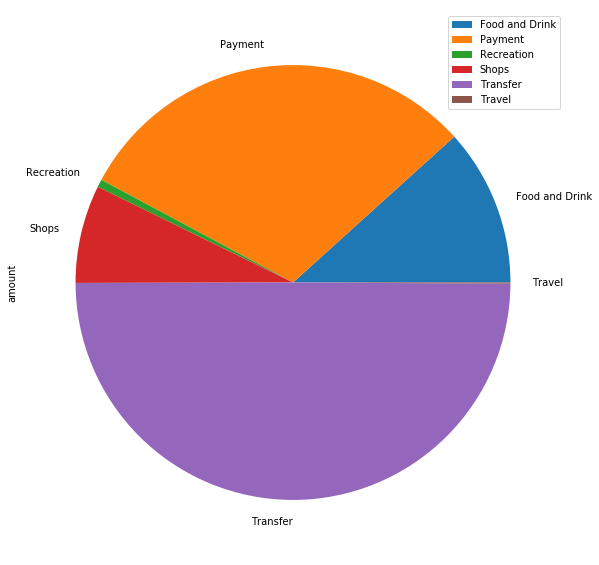

In [29]:
expenses_by_category = df.groupby('category').sum()
ax = expenses_by_category.plot(y='amount', kind='pie', figsize=(10,10))


### Calculate the expenses per month

[Text(0, 0, '2020-Mar'), Text(0, 0, '2020-Apr')]

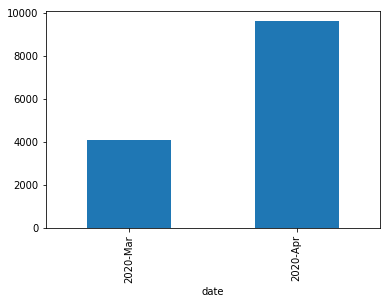

In [380]:
expenses_per_month = df['amount'].resample('M').sum()
ax = expenses_per_month.plot(kind='bar')
x_labels = expenses_per_month.index.strftime('%Y-%b')
ax.set_xticklabels(x_labels)